In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('forestfire.csv',encoding = "ISO-8859-1")

In [3]:
reviews = df[['text']]

In [4]:
reviews.head()

,text
0,After several years of historic wildfires
1,After several years of historic wildfires
2,California will never control raging wildfires...
3,PG&E says blackouts limited fires despite 1 li...
4,Wait. I thought it was always sunny in Califor...


In [5]:
# create dictionary list (prositive)

dict_p = []
f = open('positive-words.txt', 'r')   
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
        dict_p.append(t)
f.close()

In [6]:
# create dictionary list (negative)

dict_n = []
f = open('negative-words.txt', 'r')
# f = open('negative-words.txt', 'r', encoding='ISO-8859-1') 
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
         dict_n.append(t)
f.close()

In [7]:
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 

poscnt = []
negcnt = []
netcnt = []

for nrow in range(0,len(reviews)):
    
    text = df.text[nrow].lower()
    qa = 0
    qb = 0

    for word in dict_p :
        if (word in text) :
            qa = qa + 1

    for word in dict_n :
        if (word in text) :
            qb = qb + 1

    qc = qa - qb
    
    poscnt.append(qa)
    negcnt.append(qb)
    netcnt.append(qc)

In [8]:
df['poscnt'] = poscnt
df['negcnt'] = negcnt
df['netcnt'] = netcnt
df[['text','poscnt','negcnt','netcnt']]

,text,poscnt,negcnt,netcnt
0,After several years of historic wildfires,0,3,-3
1,After several years of historic wildfires,0,3,-3
2,California will never control raging wildfires...,2,9,-7
3,PG&E says blackouts limited fires despite 1 li...,6,18,-12
4,Wait. I thought it was always sunny in Califor...,0,1,-1
5,\Cave Fire\ explodes in Southern California mo...,6,11,-5
6,Above-ground power lines grow in risk as clima...,6,13,-7
7,Three Business Takeaways From The Wildfires h...,3,11,-8
8,Full house hearing rePG&E Reportedly Nears $1....,2,5,-3
9,WCAHS investigator,0,0,0


In [9]:
result = []
pos=0
neg=0
net=0
for num in netcnt:
    if (num > 0):
        result.append('pos')
        pos+=1
    elif (num < 0):
        result.append('neg')
        neg+=1
    else:
        result.append('net')
        net+=1
        
result

['neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'net',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'pos',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'net',
 'net',
 'net',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',


In [10]:
df['result'] = result

In [11]:
df[['text','poscnt','negcnt','netcnt','result']]

,text,poscnt,negcnt,netcnt,result
0,After several years of historic wildfires,0,3,-3,neg
1,After several years of historic wildfires,0,3,-3,neg
2,California will never control raging wildfires...,2,9,-7,neg
3,PG&E says blackouts limited fires despite 1 li...,6,18,-12,neg
4,Wait. I thought it was always sunny in Califor...,0,1,-1,neg
5,\Cave Fire\ explodes in Southern California mo...,6,11,-5,neg
6,Above-ground power lines grow in risk as clima...,6,13,-7,neg
7,Three Business Takeaways From The Wildfires h...,3,11,-8,neg
8,Full house hearing rePG&E Reportedly Nears $1....,2,5,-3,neg
9,WCAHS investigator,0,0,0,net


In [12]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6))

In [13]:
import matplotlib.pyplot as plt

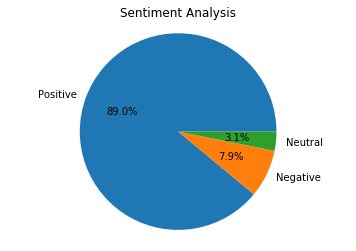

In [14]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = list(df.result.value_counts())
fig = plt.figure()  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')

plt.show()

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 
import nltk
nltk.download('vader_lexicon')
sentiment=[]
sid = SentimentIntensityAnalyzer()
for sentence in df['text']:
    ss = sid.polarity_scores(sentence)
    sentiment.append(ss)
    for k in ss:
         print('{0}: {1},  '.format(k, ss[k]), end='')
    print()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lvzhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.794,  pos: 0.206,  compound: 0.5667,  
neg: 0.163,  neu: 0.837,  pos: 0.0,  compound: -0.7772,  
neg: 0.0,  neu: 0.588,  pos: 0.412,  compound: 0.5994,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.086,  neu: 0.762,  pos: 0.151,  compound: 0.7003,  
neg: 0.079,  neu: 0.888,  pos: 0.033,  compound: -0.3118,  
neg: 0.037,  neu: 0.927,  pos: 0.037,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.749,  pos: 0.251,  compound: 0.6901,  
neg: 0.277,  neu: 0.723,  pos: 0.0,  compound: -0.7096,  
neg: 0.058,  neu: 0.812,  pos: 0.13,  compound: 0.2746,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.174,  neu: 0.799,  pos: 0.027,  compound: -0.782,  
neg: 0.101,  neu: 0.792,  pos: 0.106,  compound: -0.2023,  
neg: 0.173,  neu: 0.827,  pos: 0.0,  compound: -0.3182,  
neg

In [16]:
df_s = pd.DataFrame(sentiment)

In [17]:
df['pos_score'] = df_s['pos']
df['neu_score'] = df_s['neu']
df['neg_socre'] = df_s['neg']
df['comp_score'] = df_s['compound']

In [18]:
df[['text','pos_score','neu_score','neg_socre','comp_score']]

,text,pos_score,neu_score,neg_socre,comp_score
0,After several years of historic wildfires,0.000,1.000,0.000,0.0000
1,After several years of historic wildfires,0.000,1.000,0.000,0.0000
2,California will never control raging wildfires...,0.206,0.794,0.000,0.5667
3,PG&E says blackouts limited fires despite 1 li...,0.000,0.837,0.163,-0.7772
4,Wait. I thought it was always sunny in Califor...,0.412,0.588,0.000,0.5994
5,\Cave Fire\ explodes in Southern California mo...,0.000,1.000,0.000,0.0000
6,Above-ground power lines grow in risk as clima...,0.151,0.762,0.086,0.7003
7,Three Business Takeaways From The Wildfires h...,0.033,0.888,0.079,-0.3118
8,Full house hearing rePG&E Reportedly Nears $1....,0.037,0.927,0.037,0.0000
9,WCAHS investigator,0.000,1.000,0.000,0.0000


In [19]:
result_NLTK = []
pos=0
neg=0
net=0
for num in df_s['compound']:
    if (num > 0):
        result_NLTK.append('pos')
        pos+=1
    elif (num < 0):
        result_NLTK.append('neg')
        neg+=1
    else:
        result_NLTK.append('net')
        net+=1
        
result_NLTK

['net',
 'net',
 'pos',
 'neg',
 'pos',
 'net',
 'pos',
 'neg',
 'net',
 'net',
 'pos',
 'neg',
 'pos',
 'net',
 'net',
 'neg',
 'neg',
 'neg',
 'net',
 'net',
 'pos',
 'pos',
 'pos',
 'neg',
 'net',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'net',
 'net',
 'pos',
 'net',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'net',
 'neg',
 'neg',
 'net',
 'net',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'net',
 'pos',
 'net',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'net',
 'net',
 'pos',
 'pos',
 'net',
 'neg',
 'net',
 'pos',
 'pos',
 'net',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'net',
 'net',
 'net',
 'neg',
 'net',
 'neg',
 'neg',
 'net',
 'net',
 'net',
 'net',
 'neg',
 'net',
 'net',
 'net',
 'pos',
 'net',
 'net',
 'neg',
 'net',
 'net',
 'net',
 'net',


In [20]:
df['result_NLTK'] = result_NLTK

In [21]:
df[['text','pos_score','neu_score','neg_socre','comp_score','result_NLTK']]

,text,pos_score,neu_score,neg_socre,comp_score,result_NLTK
0,After several years of historic wildfires,0.000,1.000,0.000,0.0000,net
1,After several years of historic wildfires,0.000,1.000,0.000,0.0000,net
2,California will never control raging wildfires...,0.206,0.794,0.000,0.5667,pos
3,PG&E says blackouts limited fires despite 1 li...,0.000,0.837,0.163,-0.7772,neg
4,Wait. I thought it was always sunny in Califor...,0.412,0.588,0.000,0.5994,pos
5,\Cave Fire\ explodes in Southern California mo...,0.000,1.000,0.000,0.0000,net
6,Above-ground power lines grow in risk as clima...,0.151,0.762,0.086,0.7003,pos
7,Three Business Takeaways From The Wildfires h...,0.033,0.888,0.079,-0.3118,neg
8,Full house hearing rePG&E Reportedly Nears $1....,0.037,0.927,0.037,0.0000,net
9,WCAHS investigator,0.000,1.000,0.000,0.0000,net


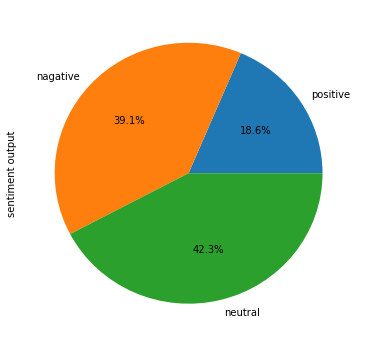

In [22]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6),autopct='%1.1f%%')